# Spaceship Titanic

## Entendimiento del problema

Una nave interestelar sufrió un accidente que causo que muchos de los casi 13,000 pasajeros fueran enviados a una dimensión alternativa, se necesita predecir que pasajeros están perdidos para que los equipos de rescate los identifiquen y puedan traerlos de regreso, para esta tarea solo se tienen los datos de una computadora de la nave que sufrió daños.

## Datos

### Diccionario

- **PassengerId**: Identificador unico de cada pasajero.
- **HomePlanet**: Planeta de origen del pasajero.
- **CryoSleep**: Indica si el pasajero eligió ser puesto en criosueño durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.
- **Cabin**: El número de cabina donde se hospeda el pasajero. Toma la forma cubierta/número/lado, donde lado puede ser *P* para babor o *S* para estribor.
- **Destination**: El planeta al que desembarcará el pasajero.
- **Age**: Edad del pasajero.
- **VIP**: Indica si el pasajero ha pagado por un servicio especial durante el viaje.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.
- **Name**: Nombre del pasajero.
- **Transported** (Variable a predecir): Indica si el pasajero fue transportado a otra dimensión. 

### Librerias

In [ ]:
 # Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Multiple output

### Cargado de datos

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Dimensiones y preview
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')
train.head()

Train shape: (8693, 14)
Test shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Valores nulos

In [ ]:
train.isna().sum()
test.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Duplicados

In [ ]:
train.duplicated().sum()
test.duplicated().sum()

0

0

### Cardinalidad

In [ ]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### Tipos de dato

In [ ]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### 

## Análisis exploratorio de datos

### Distribución del target

El target esta muy bien balanceado, no es necesario utilizar tecnicas de under/over-sampling.

In [ ]:
fig = px.pie(values=train.Transported.value_counts(), names=["True", "False"], title="Transported")
fig.show()

### Variables continuas

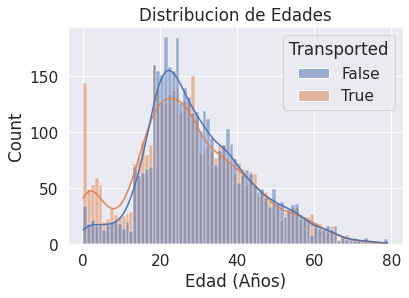

In [ ]:
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True);
plt.title('Distribucion de Edades');
plt.xlabel('Edad (Años)');

Notas:

- Crear nueva columna que explique si el pasajero es niño, joven o adulto. (rangos de edad)

In [ ]:
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

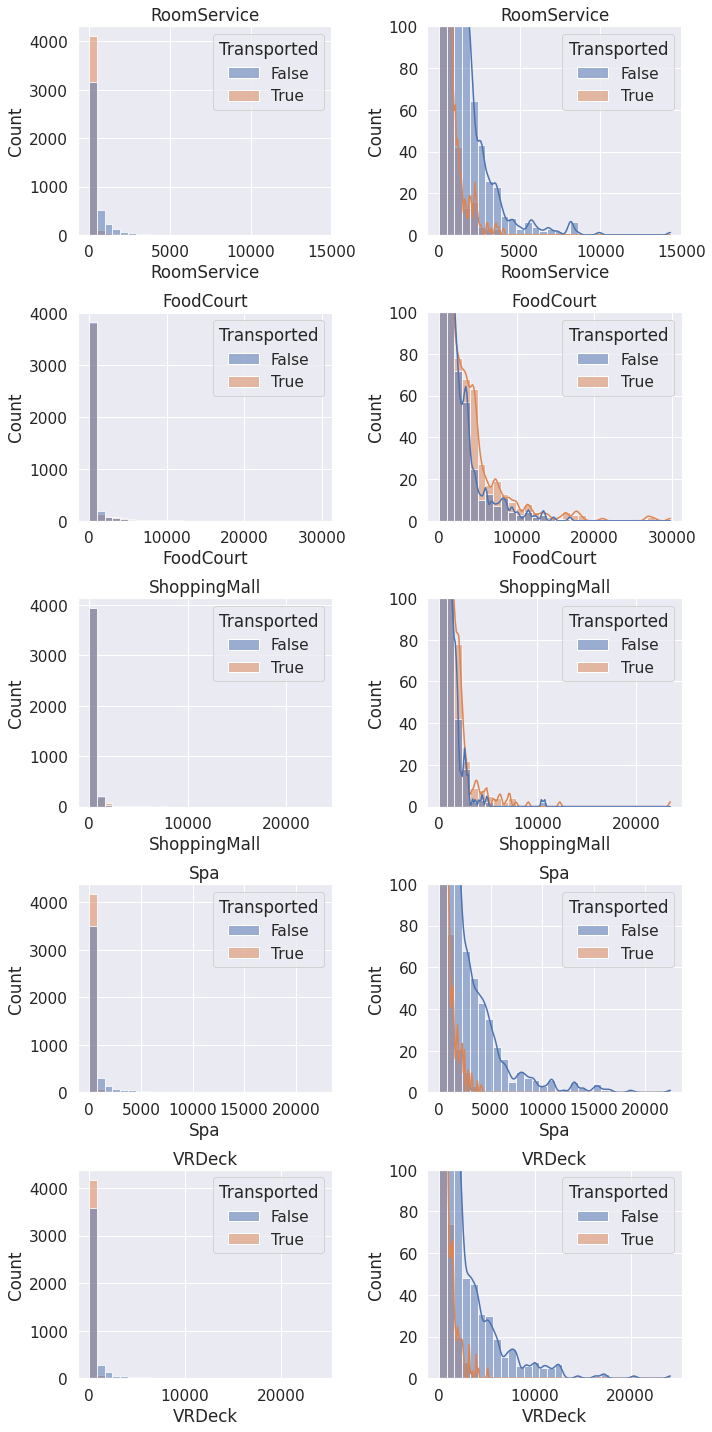

In [ ]:
fig = plt.figure(figsize=(10,20));

for i, feature in enumerate(amenities):
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.histplot(data=train, x=feature, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(feature)
    
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=feature, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(feature)

fig.tight_layout()
plt.show();

Notas:

- La mayoria de personas no gasta dinero en amenidades.

- Las distribuciones decaen exponencialmente.

- Hay pocos outliers.

- Los que fueron transportados tienden a gastar poco.

- Se podria crear un nuevo feature que sea la suma total gastada en todas las amenidades.

- Se podria crear un feature binario que diga si el pasajero gasto o no.

- Es necesario aplicar una transformacion logistica para evitar sesgo.

### Variables categoricas

In [ ]:
categoricals = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

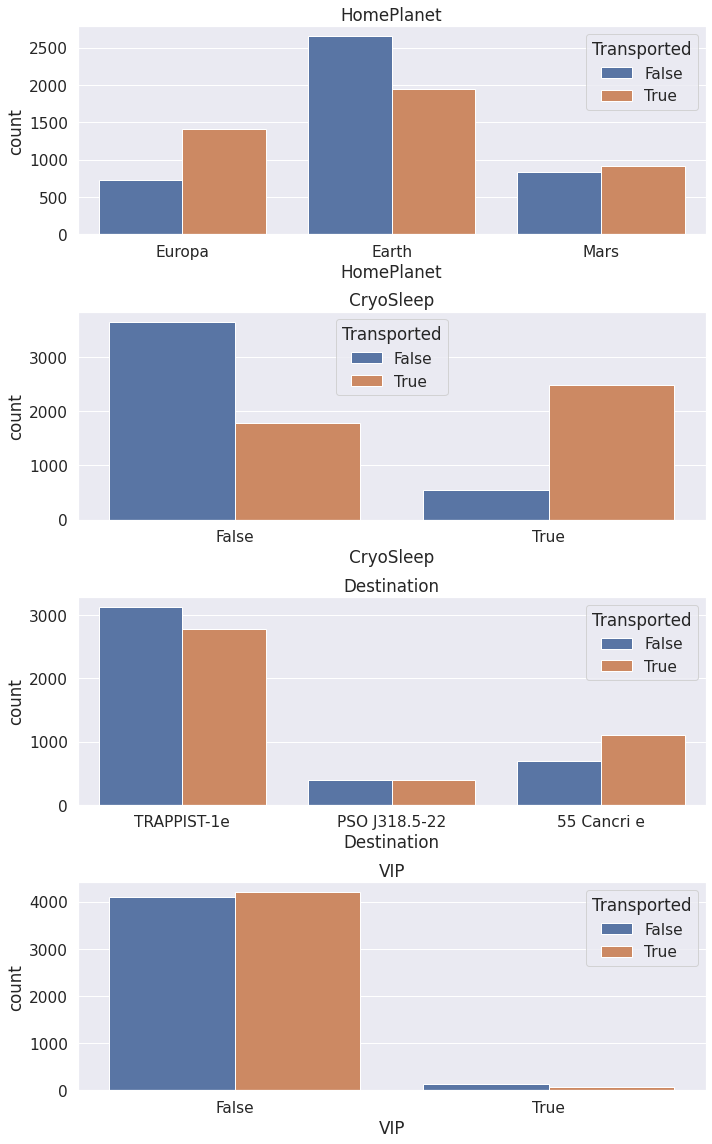

In [ ]:
fig = plt.figure(figsize=(10,16))
for i, feature in enumerate(categoricals):
    ax = fig.add_subplot(4, 1, i+1)
    sns.countplot(data=train, x=feature, axes=ax, hue='Transported')
    ax.set_title(feature)

fig.tight_layout()
plt.show();

Notas:

- VIP parece no ser util, se debe considerar quitarla para evitar overfitting.

- CryoSleep parece ser util.

### Variables cualitativas

In [ ]:
train[['PassengerId', 'Cabin' ,'Name']].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


Notas:

- Se puede separar PassengerId en grupo (primeros 4 digitos) y numero dentro del grupo (ultimos dos digitos).

- Separar Cabin en 3 features.

- Se podria extraer el apellido para agrupar por familias.

## Preparacion de los datos

### Edad

In [ ]:
def process_age(train):
    train['age_group'] = np.nan
    train.loc[train['Age'] <= 17,'age_group'] = '0-12'
    train.loc[(train['Age'] > 12) & (train['Age'] < 18),'age_group'] = '13-17'
    train.loc[(train['Age'] >= 18) & (train['Age'] <= 30),'age_group'] = '18-30'
    train.loc[(train['Age'] > 30) & (train['Age'] <= 50),'age_group'] = '31-50'
    train.loc[train['Age'] > 50,'age_group'] = '51+'

    return train

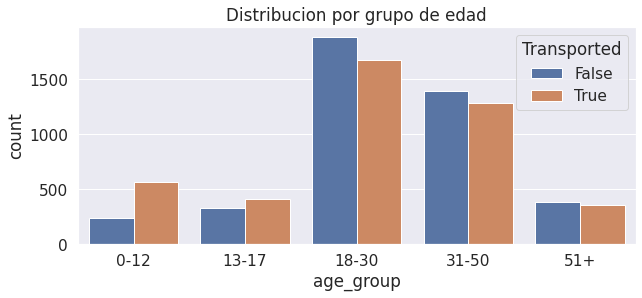

In [ ]:
plt.figure(figsize=(10,4))
fig = sns.countplot(data=train, x='age_group', hue='Transported', order=['0-12','13-17','18-30','31-50','51+'])
plt.title('Distribucion por grupo de edad');

### Gastos

In [ ]:
def process_amenities(train):
    train['total_expenses'] = train[amenities].sum(axis=1)
    train['no_expenses'] = (train['total_expenses'] == 0).astype(int)

    return train

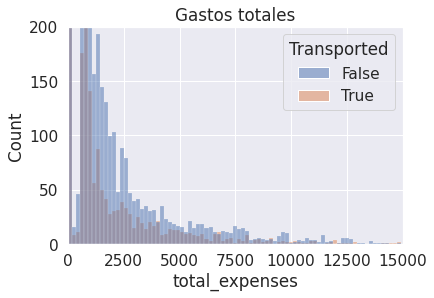

In [ ]:
sns.histplot(data=train, x='total_expenses', hue='Transported', bins=200);
plt.title('Gastos totales');
plt.ylim([0, 200]);
plt.xlim([0, 15000]);

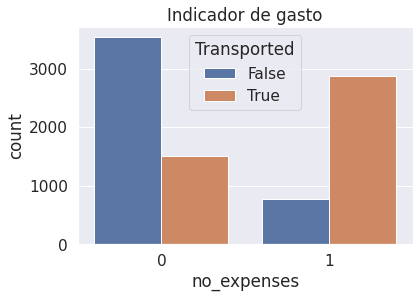

In [ ]:
sns.countplot(data=train, x='no_expenses', hue='Transported');
plt.title('Indicador de gasto');

### Cabina

In [ ]:
def process_cabin(train, drop=False):
    train['Cabin'].fillna('X/9999/X', inplace=True)
    train['cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
    train['cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    train['cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])
    train.loc[train['cabin_deck'] == 'X', 'cabin_deck'] = np.nan
    train.loc[train['cabin_number'] == 9999, 'cabin_number'] = np.nan
    train.loc[train['cabin_side'] == 'X', 'cabin_side'] = np.nan
    train.drop('Cabin', axis=1, inplace=True)

    if drop:
        train = train[train["cabin_deck"] != "T"].copy()

    return train

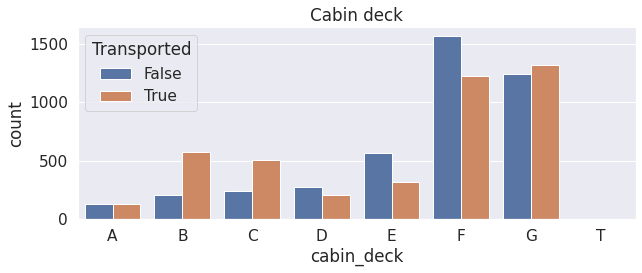

In [ ]:
fig=plt.figure(figsize=(10,12));
plt.subplot(3,1,1);
sns.countplot(data=train, x='cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T']);
plt.title('Cabin deck');

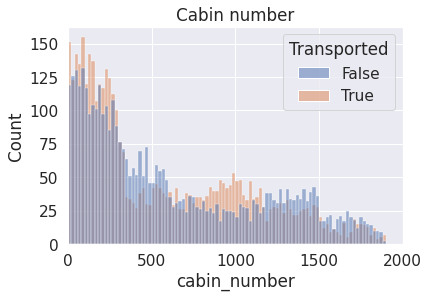

In [ ]:
sns.histplot(data=train, x='cabin_number', hue='Transported', binwidth=20);
plt.title('Cabin number');
plt.xlim([0, 2000]);

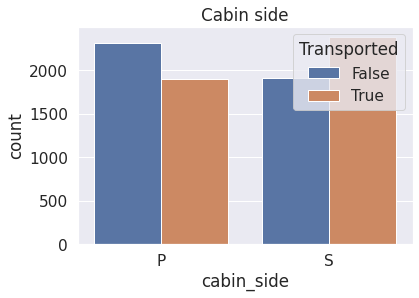

In [ ]:
sns.countplot(data=train, x='cabin_side', hue='Transported');
plt.title('Cabin side');

In [ ]:
train[train["cabin_deck"] == "T"].shape[0]

5

Notas: 

- La cabina T solo tiene 5 registros (outlier)

- La distribucion de numero de cabina esta escalonada (varios grupos)

### Grupo

In [ ]:
def process_group(train):
    train['group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

    return train

### Pipeline

In [ ]:
train = (train
        .pipe(process_age)
        .pipe(process_amenities)
        .pipe(process_cabin, drop=True)
        .pipe(process_group)
)

In [ ]:
test = (test
        .pipe(process_age)
        .pipe(process_amenities)
        .pipe(process_cabin)
        .pipe(process_group)
)

### Encoding de variables categoricas

In [ ]:
y = train['Transported'].copy().astype(int)
X = train.drop('Transported', axis=1).copy()

In [ ]:
categoricals.extend(["age_group", "cabin_deck", "cabin_side"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X[categoricals] = X[categoricals].apply(encoder.fit_transform)
test[categoricals] = test[categoricals].apply(encoder.fit_transform)

### Imputacion de valores faltantes

In [ ]:
numeric_cols = list(X.select_dtypes(include=np.number).columns)

In [ ]:
from sklearn.impute import KNNImputer


train_imputation = pd.concat([X[numeric_cols], test[numeric_cols]], axis=0).reset_index(drop=True)
imputer = KNNImputer(n_neighbors=10)
imputer.fit(train_imputation)

KNNImputer(n_neighbors=10)

In [ ]:
X[numeric_cols] = imputer.transform(X[numeric_cols])

In [ ]:
test[numeric_cols] = imputer.transform(test[numeric_cols])

In [ ]:
X.Name = X.Name.fillna("No name")
test.Name = test.Name.fillna("No name")

In [ ]:
X.isna().sum()
test.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
age_group         0
total_expenses    0
no_expenses       0
cabin_deck        0
cabin_number      0
cabin_side        0
group             0
dtype: int64

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
age_group         0
total_expenses    0
no_expenses       0
cabin_deck        0
cabin_number      0
cabin_side        0
group             0
dtype: int64

### Escalamiento

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])

### Matriz de correlacion

In [ ]:
matrix = pd.concat([X, y], axis=1).corr()

<Figure size 432x288 with 0 Axes>

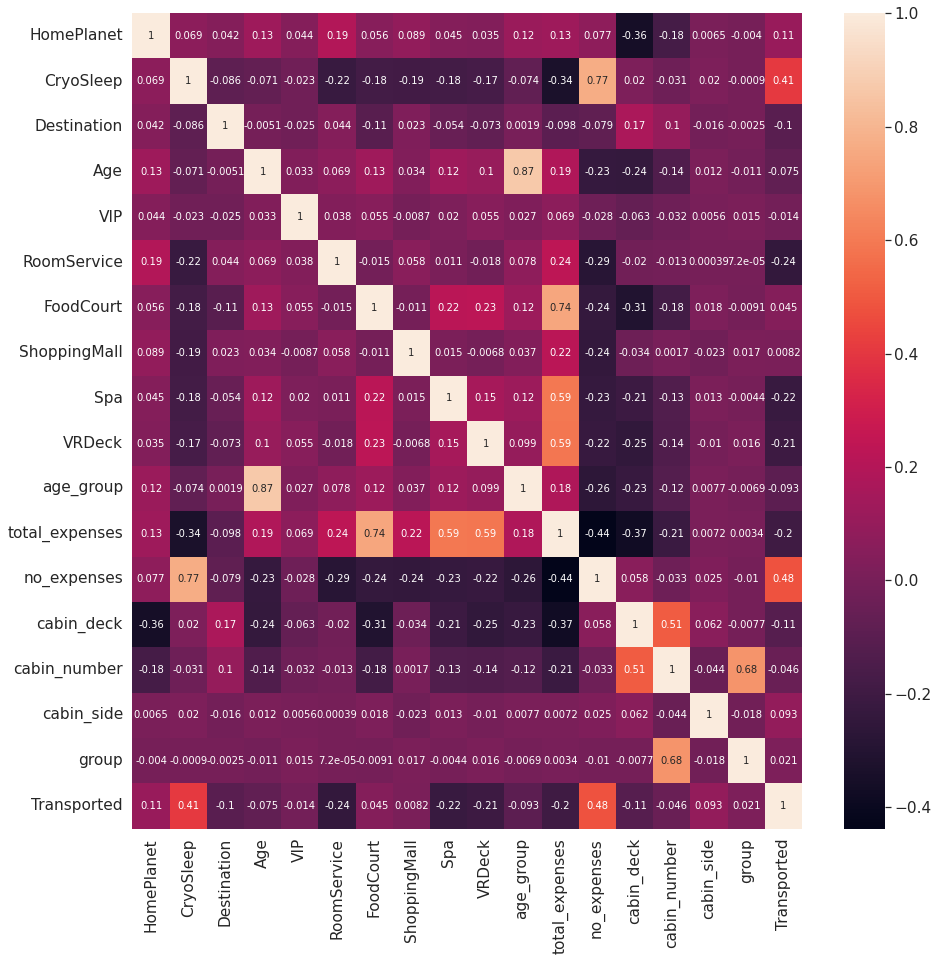

In [ ]:
plt.figure()
fig = plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True)
plt.show();

### PCA

Ejercicio para darse una idea de si hay una frontera clara entre clases.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(X[numeric_cols])
total_var = pca.explained_variance_ratio_.sum() * 100

In [ ]:
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y, size=0.1*np.ones(len(X)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

### Datasets finales

In [ ]:
pd.concat([X, y], axis=1).to_pickle("train.pk1")
test.to_pickle("test.pk1")

## Exploracion de modelos

### Slicing de datos

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = X[numeric_cols].drop(["VIP"], axis=1)

In [ ]:
data.shape

(8688, 16)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify=y, train_size=0.8, test_size=0.2, random_state=42)

### Benchmark

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
%%capture
!pip install xgboost lightgbm catboost

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time

In [ ]:
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "XGBoost" : XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'), # XGBoost takes too long
    "LGBM" : LGBMClassifier(random_state=0),
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB()
}

In [ ]:
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

In [ ]:
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

In [ ]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_test, y_test)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 61

GridSearchCV(estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
                         'max_iter': [50, 100, 150], 'penalty': ['l1', 'l2']})

Model: LogisticRegression
Training time (mins): 1.0

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lon

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]})

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

Model: KNN
Training time (mins): 0.1



GridSearchCV(estimator=SVC(probability=True, random_state=0), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

Model: SVC
Training time (mins): 13.0



GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

Model: RandomForest
Training time (mins): 2.59



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca..._onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [4, 8, 12],
                         'n_estimators': [50, 100, 150, 200]})

Model: XGBoost
Training time (mins): 4.99



GridSearchCV(estimator=LGBMClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [4, 8, 12],
                         'n_estimators': [50, 100, 150, 200]})

Model: LGBM
Training time (mins): 10.28



GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f514e120fa0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [4, 8, 12],
                         'n_estimators': [50, 100, 150, 200]})

Model: CatBoost
Training time (mins): 13.26



GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07]})

Model: NaiveBayes
Training time (mins): 0.0



In [ ]:
valid_scores


,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.785386,1.00
1,KNN,0.784235,0.10
2,SVC,0.799770,13.00
3,RandomForest,0.795167,2.59
4,XGBoost,0.814154,4.99
5,LGBM,0.803797,10.28
6,CatBoost,0.803797,13.26
7,NaiveBayes,0.735903,0.00


Resumen:

Nuevas columnas:

- age_group

- total_expenses

- no_expenses

- cabin -> cabin_deck, cabin_number, cabin_side

- group

Encoding: Label Encoding (me funciono mejor para la imputacion)

Imputacion: KNN imputer

Escalamiento: Standard Scaler

Estos procesos para ambos datasets (train, test)

### Model Training

In [ ]:
grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": np.arange(0, 2, 0.1), 
    #"solver": ["newton-cg", "sag", "saga", "lbfg"],
    "max_iter": np.arange(50, 200, 50)
    }

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log = LogisticRegression()


# Busqueda de mejores parametros posibles.
grid_search = GridSearchCV(
                    estimator=log, 
                    param_grid=grid, 
                    n_jobs=1, 
                    cv=cv, 
                    scoring="accuracy", 
                    error_score=0
)

# Definicion del modelo final con los parametros encontrados.
results = grid_search.fit(X_train, y_train)
model = log.set_params(**results.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9f2a1e9c-2ffe-4fae-82fc-6e1427fb5b49' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>